## Comparing AXL with EGFR or RTK-wide signaling

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from msresist.pre_processing import preprocessing
from msresist.clustering import DDMC
import statannot
import numpy as np

matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

### Import AXL C123 genes

In [6]:
axl = preprocessing(AXLm_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)
d = axl.select_dtypes(include=['float64']).T
i = axl.select_dtypes(include=['object'])

# Fit DDMC
ddmc_axl = DDMC(i, n_components=5, SeqWeight=2, distance_method="PAM250", random_state=5).fit(d)
axl.insert(0, "Cluster", ddmc_axl.labels())

axl.columns = list(axl.columns[:8]) + ["WT", "KO", "KD", "KI", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]

c123 = [*set(axl[(axl["Cluster"] == 1) | (axl["Cluster"] == 2) | (axl["Cluster"] == 3)]["Gene"].to_list())]
c1 = [*set(axl[(axl["Cluster"] == 1)]["Gene"].to_list())]
c2 = [*set(axl[(axl["Cluster"] == 2)]["Gene"].to_list())]
c3 = [*set(axl[(axl["Cluster"] == 3)]["Gene"].to_list())]

In [11]:
axl.sort_values(by="Cluster").to_csv("AXL_MS.csv")

### Import GF mass spec data

In [5]:
gf = preprocessing(AXLwt_GF=True, Vfilter=True, FCfilter=False, log2T=True, mc_col=True, mc_row=True).loc[:, ["Gene", "Position", "PC9", "Erl", "Erl+HGF", "Erl+FGF", "Erl+IGF"]].set_index("Gene")

In [6]:
axl = axl.reset_index().set_index(["Gene", "Position"])
c123_ps = axl[(axl["Cluster"] == 1) | (axl["Cluster"] == 2) | (axl["Cluster"] == 3)].index.to_list()
c1_ps = axl[(axl["Cluster"] == 1)].index.to_list()
c2_ps = axl[(axl["Cluster"] == 2)].index.to_list()
c3_ps = axl[(axl["Cluster"] == 3)].index.to_list()

In [8]:
gf = gf.reset_index().set_index(["Gene", "Position"])
ds = []
for pset in [c123_ps, c1_ps, c2_ps, c3_ps, gf.index]:
    ovp = [ps for ps in pset if ps in gf.index]
    gf_ovp = gf.loc[ovp].reset_index()
    ds.append(pd.melt(gf_ovp, ["Gene", "Position"], gf_ovp.columns[1:], var_name="Treatment", value_name="norm log(p-signal)"))

/tmp/ipykernel_3273957/2395267886.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  ovp = [ps for ps in pset if ps in gf.index]
/tmp/ipykernel_3273957/2395267886.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  ovp = [ps for ps in pset if ps in gf.index]
/tmp/ipykernel_3273957/2395267886.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  ovp = [ps for ps in pset if ps in gf.index]
/tmp/ipykernel_3273957/2395267886.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  ovp = [ps for ps in pset if ps in gf.index]
/tmp/ipykernel_3273957/2395267886.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  ovp = [ps for ps in pset if ps in gf.index]


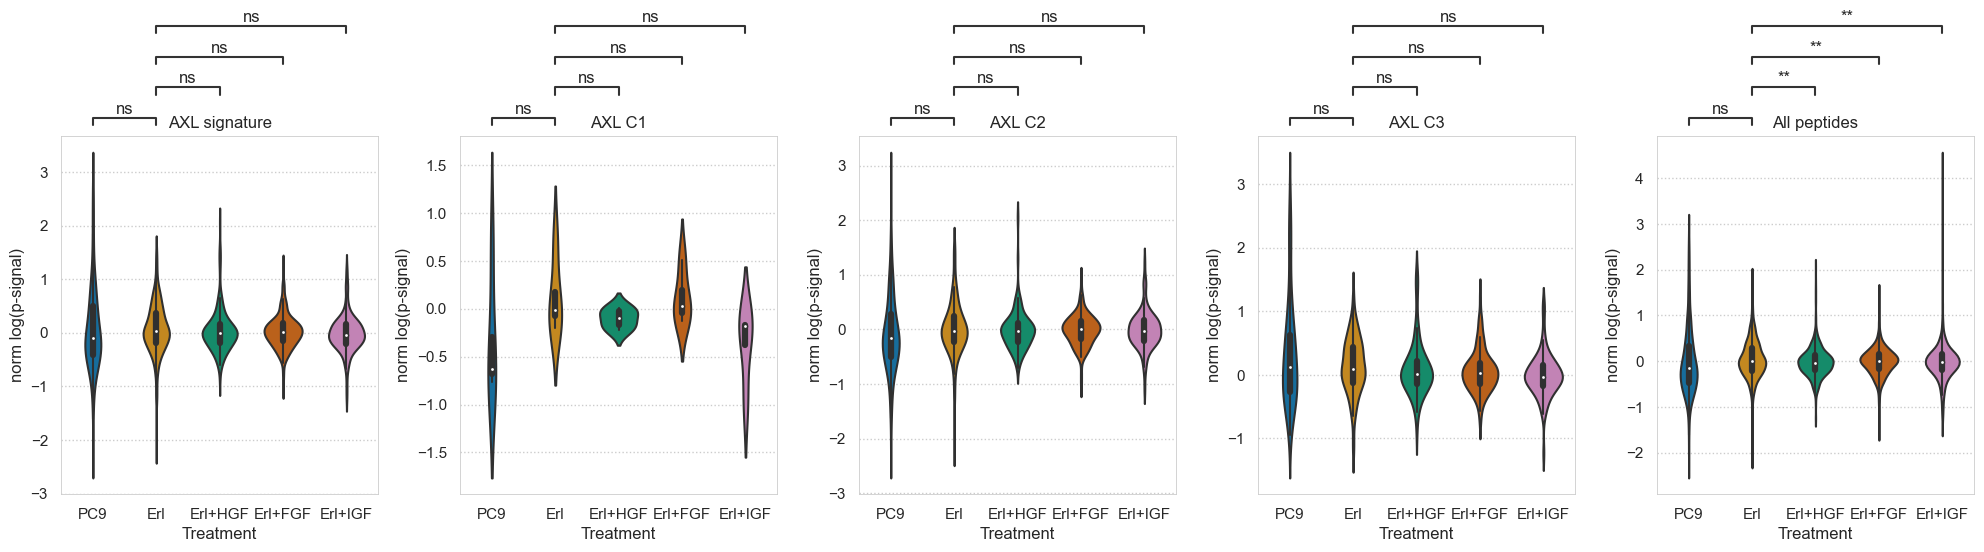

In [15]:
_, ax = plt.subplots(1, 5, figsize=(20, 6), sharey=False)
l = ["AXL signature", "AXL C1", "AXL C2", "AXL C3", "All peptides"]
for ii in range(len(l)):
    sns.violinplot(ds[ii], x="Treatment", y="norm log(p-signal)", ax=ax[ii], width=0.6).set_title(l[ii])
    box_pairs = [
        ("PC9", "Erl"),
        ("Erl", "Erl+HGF"),
        ("Erl", "Erl+FGF"),
        ("Erl", "Erl+IGF")]
    statannot.add_stat_annotation(ax=ax[ii], data=ds[ii], y="norm log(p-signal)", x="Treatment", box_pairs=box_pairs, test="t-test_ind", text_format="star", loc="outside", verbose=False)
    # ax[ii].set_ylim(0, 4)

plt.tight_layout()

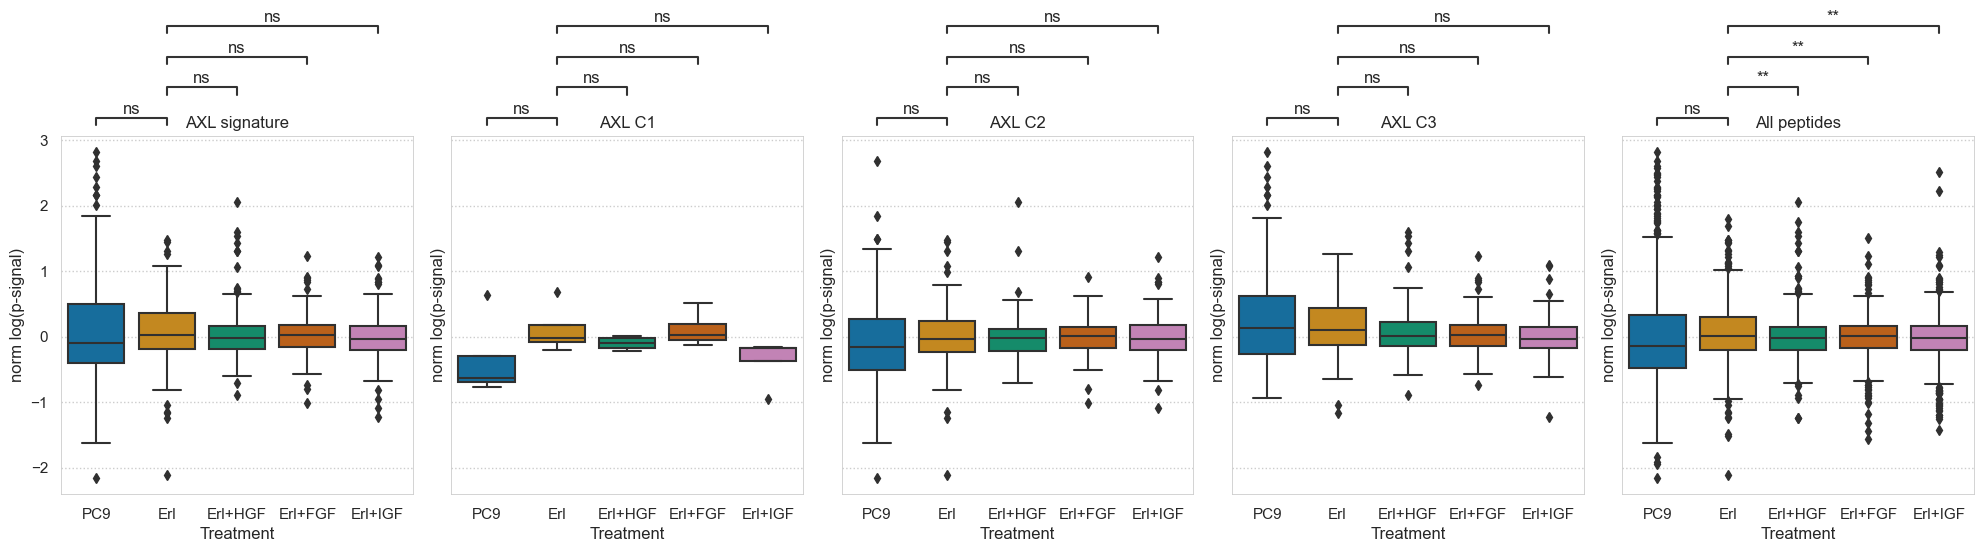

In [24]:
_, ax = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
l = ["AXL signature", "AXL C1", "AXL C2", "AXL C3", "All peptides"]
for ii in range(len(l)):
    sns.boxplot(ds[ii], dodge=True, x="Treatment", y="norm log(p-signal)", ax=ax[ii]).set_title(l[ii])
    box_pairs = [
        ("PC9", "Erl"),
        ("Erl", "Erl+HGF"),
        ("Erl", "Erl+FGF"),
        ("Erl", "Erl+IGF"),]
    statannot.add_stat_annotation(ax=ax[ii], data=ds[ii], y="norm log(p-signal)", x="Treatment", box_pairs=box_pairs, test="t-test_ind", text_format="star", loc="outside", verbose=False)

plt.tight_layout()

In [25]:
ds[1]

,Gene,Position,Treatment,norm log(p-signal)
0,MCM2,S139-p,PC9,-0.599263
1,MET,S988-p,PC9,0.635491
2,NUCKS1,S19-p,PC9,-0.657899
3,TFRC,S7-p,PC9,-0.768245
4,MCM2,S139-p,Erl,0.004495
5,MET,S988-p,Erl,0.686780
6,NUCKS1,S19-p,Erl,-0.202706
7,TFRC,S7-p,Erl,-0.035085
8,MCM2,S139-p,Erl+HGF,-0.222339
9,MET,S988-p,Erl+HGF,-0.035823
